## Telecom Churn Group Case Study:
* Rudrakanta Ghosh
* Dhritiman Banerjee

## Library Load

In [1]:
# For Data Manipulation
import pandas as pd
import numpy as np

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For model building and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,roc_curve, roc_auc_score, auc,precision_score, recall_score, f1_score
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# Setting Display Properties
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Suppress warnins
import warnings
warnings.filterwarnings('ignore')

## Raw Data Load

In [2]:
rawdf = pd.read_csv("telecom_churn_data.csv")

## Raw Data Analysis

#### Snapshot of raw data

In [3]:
rawdf.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

#### List of raw features and their data type

In [4]:
rawdf.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               99999 non-null int64
circle_id                   99999 non-null int64
loc_og_t2o_mou              98981 non-null float64
std_og_t2o_mou              98981 non-null float64
loc_ic_t2o_mou              98981 non-null float64
last_date_of_month_6        99999 non-null object
last_date_of_month_7        99398 non-null object
last_date_of_month_8        98899 non-null object
last_date_of_month_9        98340 non-null object
arpu_6                      99999 non-null float64
arpu_7                      99999 non-null float64
arpu_8                      99999 non-null float64
arpu_9                      99999 non-null float64
onnet_mou_6                 96062 non-null float64
onnet_mou_7                 96140 non-null float64
onnet_mou_8                 94621 non-null float64
onnet_mou_9                 92254 non-null float64
offnet_mou_6                960

#### Observation: There are few features which do not follow the naming convention of rest of the features.<br> Lets rename those columns to have uniformity in the feature names.

In [5]:
rawdf.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7', 'aug_vbc_3g': 'vbc_3g_8',
                      'sep_vbc_3g': 'vbc_3g_9'}, inplace=True)

### Filtering high value customers
#### High-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).<br> We will filter out the customers who are not high value customers as we need to predict churn for high value customers only.

In [6]:
rawdf['avg_amt_6_7'] = (rawdf['total_rech_amt_6'] + rawdf['total_rech_amt_7'])/2

#### Critical value for becoming high value customer i.e. 70th percentile of average recharge amount for the month of 6 and 7

In [7]:
rawdf['avg_amt_6_7'].quantile(0.7)

368.5

#### High value customer dataset

In [8]:
tempdf = rawdf[rawdf['avg_amt_6_7'] >= rawdf['avg_amt_6_7'].quantile(0.7)]

In [9]:
len(tempdf)

30011

### Tagging churn customers 
#### Those who have not made any calls (either incoming or outgoing) and have not used mobile internet even once in the churn phase.<br> The attributes needed for the same are as below:
- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

In [10]:
tempdf['churn_flg'] = np.where(((tempdf['total_ic_mou_9'] == 0.00) | (tempdf['total_og_mou_9'] == 0.00)) \
                               & (tempdf['vol_2g_mb_9'] + tempdf['vol_3g_mb_9'] == 0.00), 1, 0)

#### Lets drop all features which are related to churn phase i.e. all attributes having ‘ _9’ in their names

In [11]:
tempdf = tempdf.drop(tempdf.filter(regex='_9', axis = 1).columns, axis=1)

In [12]:
tempdf.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Data columns (total 173 columns):
mobile_number               30011 non-null int64
circle_id                   30011 non-null int64
loc_og_t2o_mou              29897 non-null float64
std_og_t2o_mou              29897 non-null float64
loc_ic_t2o_mou              29897 non-null float64
last_date_of_month_6        30011 non-null object
last_date_of_month_7        29980 non-null object
last_date_of_month_8        29854 non-null object
arpu_6                      30011 non-null float64
arpu_7                      30011 non-null float64
arpu_8                      30011 non-null float64
onnet_mou_6                 29695 non-null float64
onnet_mou_7                 29708 non-null float64
onnet_mou_8                 29073 non-null float64
offnet_mou_6                29695 non-null float64
offnet_mou_7                29708 non-null float64
offnet_mou_8                29073 non-null float64
roam_ic_mou_6               29

In [13]:
tempdf.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,avg_amt_6_7,churn_flg
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,6/27/2014,7/25/2014,8/26/2014,0,0,779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.00,0.0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,802,57.74,19.38,18.74,1185.0,1
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,

### Skewness of data
#### Lets check skewness of data in all the features.<br> We will remove all features having too much skewed data.

In [14]:
uniqStat = pd.DataFrame(tempdf.nunique()).rename(columns = {0:'uniq_cnt'})
uniqStat[uniqStat['uniq_cnt']==1].index

Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'], dtype='object')

#### Observation: All of the above features are having only one value for all the rows. So we can safely drop these columns without losing any information.

In [15]:
tempdf.drop(columns=['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 
                     'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 
                     'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'], inplace=True)

#### There are few more columns like below which are having only 0 and  1 as values.<br> Lets check the skewness of the following columns
- night_pck_user_6
- night_pck_user_7
- night_pck_user_8
- fb_user_6
- fb_user_7
- fb_user_8

In [16]:
colList = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']
for col in colList:
    print("Skewness for: {}".format(col))
    print("In numbers: \n{}".format(tempdf[col].value_counts()))
    print("In percentage: \n{}".format(round(100*tempdf[col].value_counts()/len(tempdf),2)))

Skewness for: night_pck_user_6
In numbers: 
0.0    11086
1.0      311
Name: night_pck_user_6, dtype: int64
In percentage: 
0.0    36.94
1.0     1.04
Name: night_pck_user_6, dtype: float64
Skewness for: night_pck_user_7
In numbers: 
0.0    11366
1.0      296
Name: night_pck_user_7, dtype: int64
In percentage: 
0.0    37.87
1.0     0.99
Name: night_pck_user_7, dtype: float64
Skewness for: night_pck_user_8
In numbers: 
0.0    11475
1.0      279
Name: night_pck_user_8, dtype: int64
In percentage: 
0.0    38.24
1.0     0.93
Name: night_pck_user_8, dtype: float64
Skewness for: fb_user_6
In numbers: 
1.0    10230
0.0     1167
Name: fb_user_6, dtype: int64
In percentage: 
1.0    34.09
0.0     3.89
Name: fb_user_6, dtype: float64
Skewness for: fb_user_7
In numbers: 
1.0    10377
0.0     1285
Name: fb_user_7, dtype: int64
In percentage: 
1.0    34.58
0.0     4.28
Name: fb_user_7, dtype: float64
Skewness for: fb_user_8
In numbers: 
1.0    9842
0.0    1912
Name: fb_user_8, dtype: int64
In percenta

#### Observation: We can clearly see that all of these columns are heavily skewed towards one value. So we can drop these columns without losing much information.

In [17]:
tempdf.drop(columns=colList, inplace=True)

### Null value treatment

In [18]:
nullStat = pd.DataFrame(round(100*tempdf.isna().sum()/len(tempdf),2)).rename(columns = {0:'nullPercnt'})
print(nullStat[nullStat['nullPercnt']>50])
print("Number of features with more than 50% null values: {}".format(len(nullStat[nullStat['nullPercnt']>50])))

                          nullPercnt
date_of_last_rech_data_6       62.02
date_of_last_rech_data_7       61.14
date_of_last_rech_data_8       60.83
total_rech_data_6              62.02
total_rech_data_7              61.14
total_rech_data_8              60.83
max_rech_data_6                62.02
max_rech_data_7                61.14
max_rech_data_8                60.83
count_rech_2g_6                62.02
count_rech_2g_7                61.14
count_rech_2g_8                60.83
count_rech_3g_6                62.02
count_rech_3g_7                61.14
count_rech_3g_8                60.83
av_rech_amt_data_6             62.02
av_rech_amt_data_7             61.14
av_rech_amt_data_8             60.83
arpu_3g_6                      62.02
arpu_3g_7                      61.14
arpu_3g_8                      60.83
arpu_2g_6                      62.02
arpu_2g_7                      61.14
arpu_2g_8                      60.83
Number of features with more than 50% null values: 24


#### Observation: We can see that there are 30 features which are having 50% or more null values.<br> We can't directly drop these columns as many of them are important features related to recharge and average revenue per user(arpu).

#### We will try to impute the null values for these features.

#### Null values for the features total_rech_data_, max_rech_data_, count_rech_2g_, av_rech_amt_data_, arpu_3g_ signifies that there was no recharge for the month, so these features can be imputed with the value 0

In [19]:
colList = ['total_rech_data_6', 'max_rech_data_6', 'count_rech_2g_6', 'av_rech_amt_data_6', 'arpu_3g_6', 'arpu_2g_6',
           'count_rech_3g_6', 'total_rech_data_7', 'max_rech_data_7', 'count_rech_2g_7', 'av_rech_amt_data_7', 
           'arpu_3g_7', 'arpu_2g_7', 'count_rech_3g_7', 'total_rech_data_8', 'max_rech_data_8', 'count_rech_2g_8', 
           'av_rech_amt_data_8', 'arpu_3g_8', 'arpu_2g_8', 'count_rech_3g_8']

In [20]:
for col in colList:
    tempdf[col].fillna(0, inplace=True)

In [21]:
nullStat = pd.DataFrame(round(100*tempdf.isna().sum()/len(tempdf),2)).rename(columns = {0:'nullPercnt'})
print(nullStat[nullStat['nullPercnt']>50])
print("Number of features with more than 50% null values: {}".format(len(nullStat[nullStat['nullPercnt']>50])))

                          nullPercnt
date_of_last_rech_data_6       62.02
date_of_last_rech_data_7       61.14
date_of_last_rech_data_8       60.83
Number of features with more than 50% null values: 3


#### We can now safely drop the above features as there are too much null rows and these are non-significant columns

In [22]:
tempdf.drop(columns=['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8'], inplace=True)

In [23]:
tempdf[pd.isnull(tempdf).any(axis=1)]

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,avg_amt_6_7,churn_flg
77,7001328263,30.000,82.378,674.95,NaN,34.23,149.69,NaN,39.44,179.18,NaN,0.00,0.00,NaN,0.00,0.00,NaN,34.23,149.69,NaN,32.18,101.63,NaN,0.91,29.86,NaN,0.0,3.9,NaN,67.33,281.19,NaN,0.00,0.00,NaN,0.00,0.00,NaN,6.35,40.09,NaN,6.35,40.09,NaN,2.93,28.04,NaN,0.00,7.58,NaN,0.0,0.0,0.00,76.61,356.93,NaN,79.46,191.24,NaN,43.31,94.18,NaN,2.03,0.00,NaN,124.81,285.43,NaN,8.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,8.00,0.00,0.00,135.38,289.33,NaN,0.00,0.0,NaN,2.56,0.50,NaN,0.00,3.39,4,5,3,0,1154,750,0,1000,750,6/17/2014,7/27/2014,8/27/2014,0,0,750,0.0,1.0,0.0,0.0,154.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,154.0,0.0,0.00,96.48,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1894,0.00,0.00,0.00,577.0,0
111,7001300706,596.301,146.073,0.00,55.19,3.26,NaN,45.51,12.34,NaN,0.00,0.00,NaN,0.00,0.00,NaN,55.19,3.26,NaN,43.83,12.34,NaN,0.00,0.00,NaN,0.00,0.0,NaN,99.03,15.61,NaN,0.00,0.00,NaN,0.00,0.00,NaN,1.30,0.00,NaN,1.30,0.00,NaN,0.00,0.00,NaN,0.38,2.71,NaN,1.29,0.0,NaN,102.01,18.33,0.00,50.01,16.66,NaN,160.68,58.53,NaN,5.06,0.40,NaN,215.76,75.59,NaN,0.00,0.00,NaN,0.00,0.00,NaN,1.13,0.00,NaN,1.13,0.00,NaN,217.04,75.59,0.00,0.00,0.00,NaN,0.00,0.00,NaN,0.15,0.00,NaN,12,8,5,704,178,0,154,50,0,6/13/2014,7/27/2014,8/24/2014,154,30,0,2.0,0.0,0.0,154.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,203.0,0.0,0.0,284.50,0.00,0.0,0.00,0.00,0.0,41.82,0.00,0.0,100.22,0.00,0.0,1,0,0,0,0,0,0,0,0,1,0,0,332,0.00,0.00,0.00,441.0,1
143,7000106299,695.609,39.981,0.00,1325.91,28.61,NaN,13.91,1.89,NaN,0.00,8.94,NaN,0.00,8.53,NaN,18.89,6.83,NaN,8.58,1.56,NaN,0.00,0.00,NaN,2.09,0.0,NaN,27.48,8.39,NaN,1307.01,13.58,NaN,1.95,0.00,NaN,0.00,0.00,NaN,1308.96,13.58,NaN,0.00,0.00,NaN,3.38,0.00,NaN,1.20,0.0,NaN,1341.03,21.98,0.00,30.19,7.06,NaN,27.98,1.35,NaN,10.13,0.00,NaN,68.31,8.41,NaN,25.56,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,25.

#### There are around 1524 rows with atleast 1 null value.<br> Since the number of such rows are neglible compared to the total number of rows, we can drop these rows without losing much information.

In [24]:
tempdf = tempdf[~pd.isnull(tempdf).any(axis=1)]

In [25]:
nullStat = pd.DataFrame(round(100*tempdf.isna().sum()/len(tempdf),2)).rename(columns = {0:'nullPercnt'})
print("Number of features with more than 0% null values: {}".format(len(nullStat[nullStat['nullPercnt']>0])))

Number of features with more than 0% null values: 0


### We now have handled all the null values in the dataset.
### Lets take a look on the skewness of the dataset.

In [26]:
tempdf.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,avg_amt_6_7,churn_flg
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,6/27/2014,7/25/2014,8/26/2014,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,1185.0,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,6/25/2014,7/31/2014,8/30/2014,50,0,10,0.0,2.0,3.0,0.0,154.0,23.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,0.0,0.0,19.83,0.0,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94

In [27]:
tempdf.skew()

mobile_number          -0.031761
arpu_6                 14.264622
arpu_7                 20.440813
arpu_8                 17.165333
onnet_mou_6             3.949192
onnet_mou_7             4.021222
onnet_mou_8             4.727804
offnet_mou_6            3.512351
offnet_mou_7            3.746083
offnet_mou_8            5.005352
roam_ic_mou_6          11.506460
roam_ic_mou_7          17.019059
roam_ic_mou_8          18.148846
roam_og_mou_6           9.096469
roam_og_mou_7           8.969115
roam_og_mou_8          13.792150
loc_og_t2t_mou_6        9.108757
loc_og_t2t_mou_7       10.096465
loc_og_t2t_mou_8       13.181702
loc_og_t2m_mou_6        4.149459
loc_og_t2m_mou_7        3.909223
loc_og_t2m_mou_8        3.741141
loc_og_t2f_mou_6       17.048220
loc_og_t2f_mou_7       15.560850
loc_og_t2f_mou_8       11.633842
loc_og_t2c_mou_6       17.969888
loc_og_t2c_mou_7       25.475232
loc_og_t2c_mou_8       16.122755
loc_og_mou_6            4.424712
loc_og_mou_7            4.348425
loc_og_mou

#### Observation: All the columns looks fine with respect to data skewness.
### Derived Feature
#### We can proceed with creating few derived features that will help in the predction

In [28]:
# Formating the date columns so that we can create features from these
tempdf['date_of_last_rech_6'] = pd.to_datetime(tempdf['date_of_last_rech_6'])
tempdf['date_of_last_rech_7'] = pd.to_datetime(tempdf['date_of_last_rech_7'])
tempdf['date_of_last_rech_8'] = pd.to_datetime(tempdf['date_of_last_rech_8'])

#### Day of the week on which the recharge was done

In [29]:
tempdf['date_of_last_rech_dayofwk_6'] = tempdf['date_of_last_rech_6'].dt.dayofweek.astype(str)
tempdf['date_of_last_rech_dayofwk_7'] = tempdf['date_of_last_rech_7'].dt.dayofweek.astype(str)
tempdf['date_of_last_rech_dayofwk_8'] = tempdf['date_of_last_rech_8'].dt.dayofweek.astype(str)

#### Total data(2g+3g) consumed

In [30]:
tempdf["vol_data_mb_6"] = tempdf["vol_2g_mb_6"]+tempdf["vol_3g_mb_6"]
tempdf["vol_data_mb_7"] = tempdf["vol_2g_mb_7"]+tempdf["vol_3g_mb_7"]
tempdf["vol_data_mb_8"] = tempdf["vol_2g_mb_8"]+tempdf["vol_3g_mb_8"]

#### Change in the ARPU on month 8

In [31]:
tempdf["arpu_change"] = (tempdf["arpu_6"]+tempdf["arpu_7"])/2 - tempdf["arpu_8"]

### Exploratory Data Analysis - Data Visualization

#### Minutes of Usage vs Churn

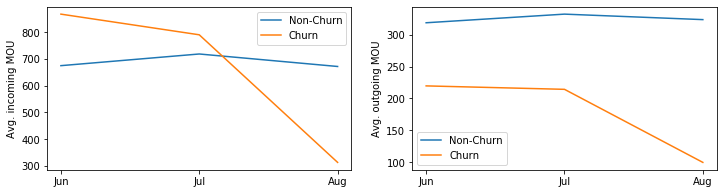

In [32]:
ic_colList = ['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']
og_colList = ['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8']

plt.figure(figsize=(12, 3))

plt.subplot(1,2,1)
plt.xticks(range(3), ['Jun', 'Jul', 'Aug'])
plt.ylabel("Avg. incoming MOU")
df=tempdf.groupby(['churn_flg'])[ic_colList].mean().T
plt.plot(df)
plt.legend(['Non-Churn', 'Churn'])

plt.subplot(1,2,2)
plt.xticks(range(3), ['Jun', 'Jul', 'Aug'])
plt.ylabel("Avg. outgoing MOU")
plt.legend(['Non-Churn', 'Churn'])
df=tempdf.groupby(['churn_flg'])[og_colList].mean().T
plt.plot(df)
plt.legend(['Non-Churn', 'Churn'])
plt.show()

#### Observation: 
- Non churners is using the incoming and outgoing facilities consistently
- Churners average usage drop significantly in action phase i.e. Aug month

#### Data usgae vs Churn

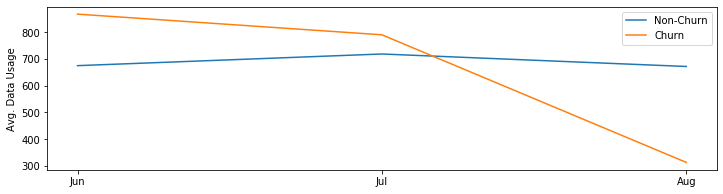

In [33]:
colList = ['vol_data_mb_6', 'vol_data_mb_7', 'vol_data_mb_8']

plt.figure(figsize=(12, 3))
plt.xticks(range(3), ['Jun', 'Jul', 'Aug'])
plt.ylabel("Avg. Data Usage")
df=tempdf.groupby(['churn_flg'])[ic_colList].mean().T
plt.plot(df)
plt.legend(['Non-Churn', 'Churn'])
plt.show()

#### Observation: 
- Non churners is using the data consistently
- Churners average usage drop significantly in action phase i.e. Aug month

#### Monthly recharge vs Churn

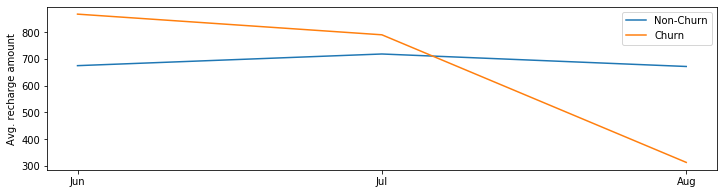

In [34]:
colList = ['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8']

plt.figure(figsize=(12, 3))
plt.xticks(range(3), ['Jun', 'Jul', 'Aug'])
plt.ylabel("Avg. recharge amount")
df=tempdf.groupby(['churn_flg'])[ic_colList].mean().T
plt.plot(df)
plt.legend(['Non-Churn', 'Churn'])
plt.show()

#### Observation: 
- Non churners is recharging consistently
- Churners average recharge drops significantly in action phase i.e. Aug month

#### Change in ARPU for Churner vs Non-Churners

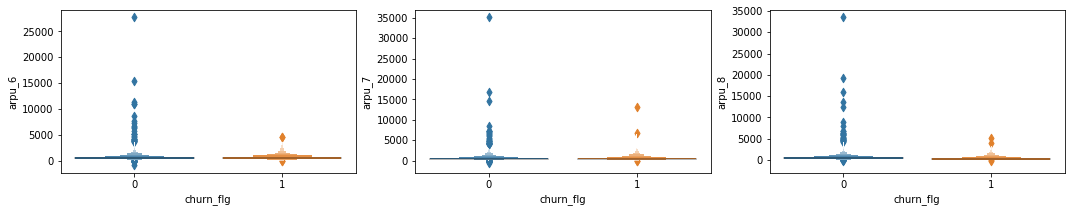

In [35]:
# sns.boxenplot(x = 'churn_flg', y = 'arpu_6', data = tempdf, hue='churn_flg')

plt.figure(figsize=(18, 3))
plt.subplot(1,3,1)
sns.boxenplot(x = 'churn_flg', y = 'arpu_6', data = tempdf)
plt.subplot(1,3,2)
sns.boxenplot(x = 'churn_flg', y = 'arpu_7', data = tempdf)
plt.subplot(1,3,3)
sns.boxenplot(x = 'churn_flg', y = 'arpu_8', data = tempdf)


#### Observation:
- Non-churners average revenue is consistent
- Churners revenue dropping in the 3rd month 

#### On-net vs Off-net minutes of usage w.r.t churn

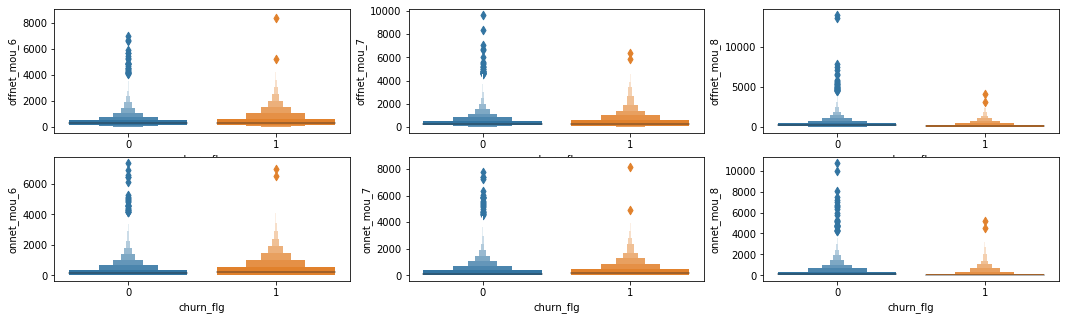

In [36]:
plt.figure(figsize=(18,5))

plt.subplot(2,3,1)
sns.boxenplot(x = 'churn_flg', y = 'offnet_mou_6', data = tempdf)

plt.subplot(2,3,2)
sns.boxenplot(x = 'churn_flg', y = 'offnet_mou_7', data = tempdf)

plt.subplot(2,3,3)
sns.boxenplot(x = 'churn_flg', y = 'offnet_mou_8', data = tempdf)

plt.subplot(2,3,4)
sns.boxenplot(x = 'churn_flg', y = 'onnet_mou_6', data = tempdf)

plt.subplot(2,3,5)
sns.boxenplot(x = 'churn_flg', y = 'onnet_mou_7', data = tempdf)

plt.subplot(2,3,6)
sns.boxenplot(x = 'churn_flg', y = 'onnet_mou_8', data = tempdf)

#### Observation:
- For churners, both offnet and onnet minutes of usage drops significantly in the month of August
- For non-churners, both offnet and onnet minutes of usage is consistent accross the months

#### Plotting onnet_mou and offnet_mou

Text(0, 0.5, 'Calls - Outside Network - Aug')

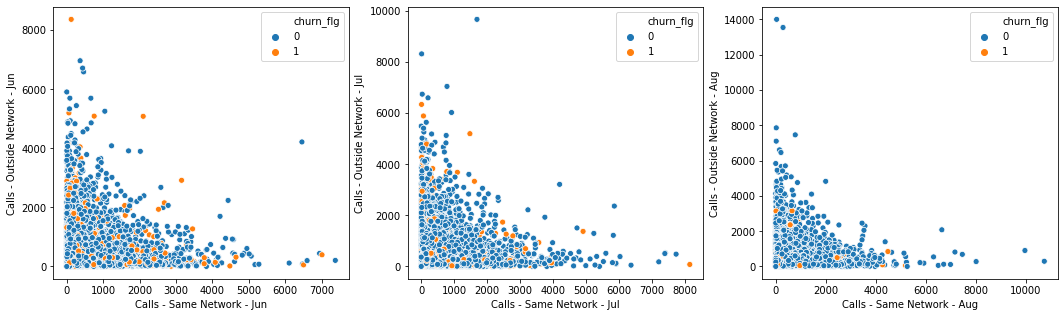

In [37]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.scatterplot(x = 'onnet_mou_6', y = 'offnet_mou_6', hue='churn_flg', data = tempdf)
plt.xlabel("Calls - Same Network - Jun")
plt.ylabel("Calls - Outside Network - Jun")

plt.subplot(1,3,2)
sns.scatterplot(x = 'onnet_mou_7', y = 'offnet_mou_7', hue='churn_flg', data = tempdf)
plt.xlabel("Calls - Same Network - Jul")
plt.ylabel("Calls - Outside Network - Jul")

plt.subplot(1,3,3)
sns.scatterplot(x = 'onnet_mou_8', y = 'offnet_mou_8', hue='churn_flg', data = tempdf)
plt.xlabel("Calls - Same Network - Aug")
plt.ylabel("Calls - Outside Network - Aug")

#### Observation: 
- Overall very less number of calls offnet and onnet in Action phase

#### Plotting in-coming v/s out-going while roaming 

Text(0, 0.5, 'Roaming Out-Going - Aug')

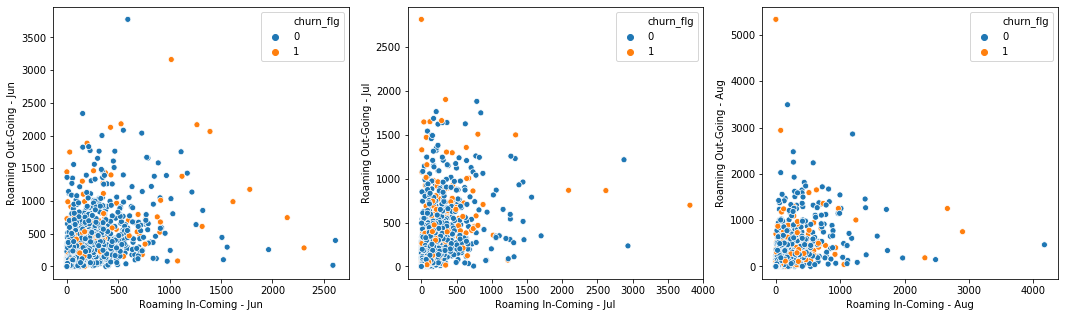

In [38]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.scatterplot(x = 'roam_ic_mou_6', y = 'roam_og_mou_6', hue='churn_flg', data = tempdf)
plt.xlabel("Roaming In-Coming - Jun")
plt.ylabel("Roaming Out-Going - Jun")

plt.subplot(1,3,2)
sns.scatterplot(x = 'roam_ic_mou_7', y = 'roam_og_mou_7', hue='churn_flg', data = tempdf)
plt.xlabel("Roaming In-Coming - Jul")
plt.ylabel("Roaming Out-Going - Jul")

plt.subplot(1,3,3)
sns.scatterplot(x = 'roam_ic_mou_8', y = 'roam_og_mou_8', hue='churn_flg', data = tempdf)
plt.xlabel("Roaming In-Coming - Aug")
plt.ylabel("Roaming Out-Going - Aug")

#### Observation:
- Overall less number of incoming and outgoing call in Action phase
- Ratio of outgoing calls and incoming calls in action phase is higher than that of in good phase

#### Total  Out-going vs total In-coming

Text(0, 0.5, 'Total In-Coming - Aug')

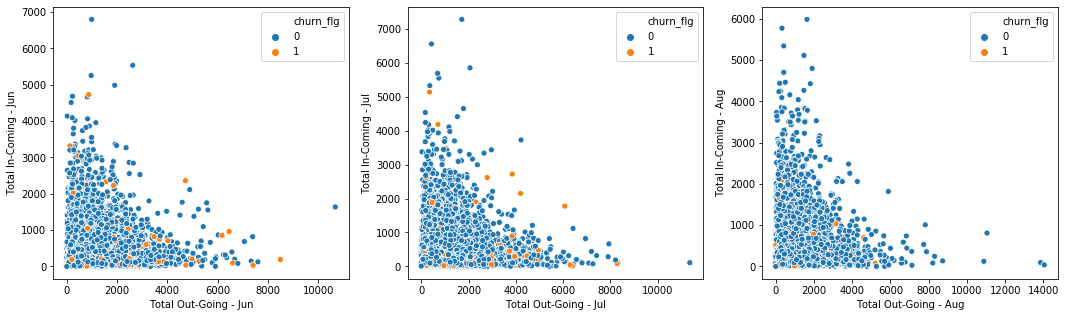

In [39]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.scatterplot(x = 'total_og_mou_6', y = 'total_ic_mou_6', hue='churn_flg', data = tempdf)
plt.xlabel("Total Out-Going - Jun")
plt.ylabel("Total In-Coming - Jun")

plt.subplot(1,3,2)
sns.scatterplot(x = 'total_og_mou_7', y = 'total_ic_mou_7', hue='churn_flg', data = tempdf)
plt.xlabel("Total Out-Going - Jul")
plt.ylabel("Total In-Coming - Jul")

plt.subplot(1,3,3)
sns.scatterplot(x = 'total_og_mou_8', y = 'total_ic_mou_8', hue='churn_flg', data = tempdf)
plt.xlabel("Total Out-Going - Aug")
plt.ylabel("Total In-Coming - Aug")

#### Observation:
- Churners dot are very less in number in action phase implying the churners have used very less incoming and outgoing call service in the action phase

#### New Feature: We can create a new feature signifying incoming to outgoing ratio to establish some new pattern

In [40]:
# Adding +1 in the denominator to avoid the edge case of division by zero when total_og_mou_ is zero
tempdf['ic_og_ratio_6'] = tempdf['total_ic_mou_6']/(tempdf['total_og_mou_6'] + 1)
tempdf['ic_og_ratio_7'] = tempdf['total_ic_mou_7']/(tempdf['total_og_mou_7'] + 1)
tempdf['ic_og_ratio_8'] = tempdf['total_ic_mou_8']/(tempdf['total_og_mou_8'] + 1)

#### Churn v/s ic_og ratio

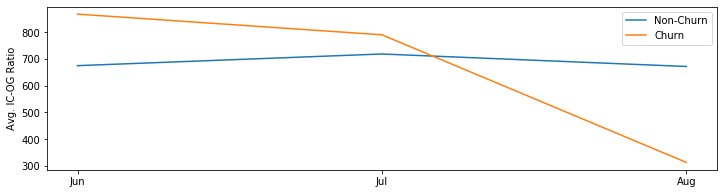

In [41]:
colList = ['ic_og_ratio_6', 'ic_og_ratio_7', 'ic_og_ratio_8']

plt.figure(figsize=(12, 3))
plt.xticks(range(3), ['Jun', 'Jul', 'Aug'])
plt.ylabel("Avg. IC-OG Ratio")
df=tempdf.groupby(['churn_flg'])[ic_colList].mean().T
plt.plot(df)
plt.legend(['Non-Churn', 'Churn'])
plt.show()

#### Observation:
- Non churners are keeping a consistent ratio accross months/phase
- Churners ratio drops significantly near the good phase

#### Data usage vs Churn

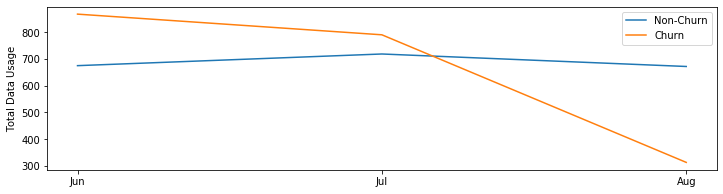

In [42]:
colList = ['vol_data_mb_6', 'vol_data_mb_7', 'vol_data_mb_8']

plt.figure(figsize=(12, 3))
plt.xticks(range(3), ['Jun', 'Jul', 'Aug'])
plt.ylabel("Total Data Usage")
df=tempdf.groupby(['churn_flg'])[ic_colList].mean().T
plt.plot(df)
plt.legend(['Non-Churn', 'Churn'])
plt.show()

#### Observation:
- Non churners are keeping a consistent usage of data
- Churners data usage drops significantly near the end of good phase

#### Last day recharge amount v/s Churn

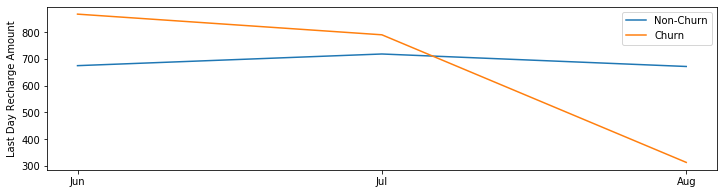

In [43]:
colList = ['last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8']

plt.figure(figsize=(12, 3))
plt.xticks(range(3), ['Jun', 'Jul', 'Aug'])
plt.ylabel("Last Day Recharge Amount")
df=tempdf.groupby(['churn_flg'])[ic_colList].mean().T
plt.plot(df)
plt.legend(['Non-Churn', 'Churn'])
plt.show()

#### Observation:
- Churners are having very less last day recharge amount after the good phase
- Non-churners are consistent accross months w.r.t recharge amount on the last day

#### Age on Network v/s Churn

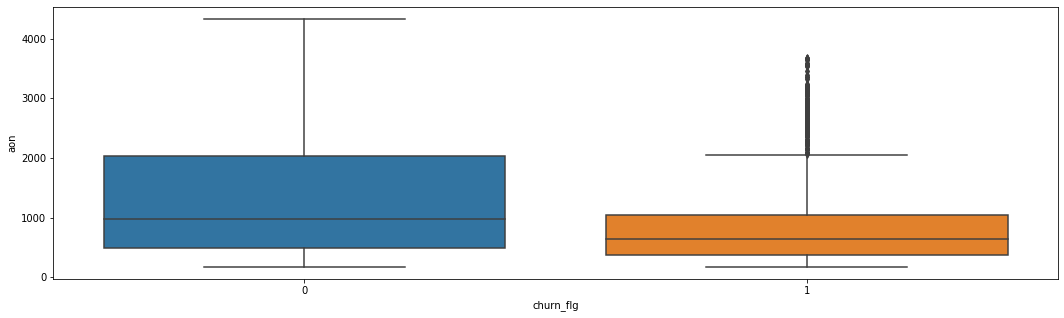

In [44]:
plt.figure(figsize=(18,5))

sns.boxplot(x = 'churn_flg', y = 'aon', data = tempdf)

#### Observation:
- Non churners are relatively for longer time in the network
- Churners are relatively much shorter time in the network

#### Day of last Recharge - Day of Week v/s Churn

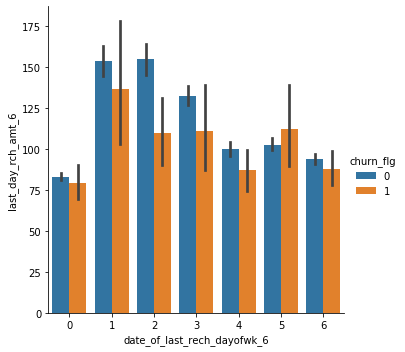

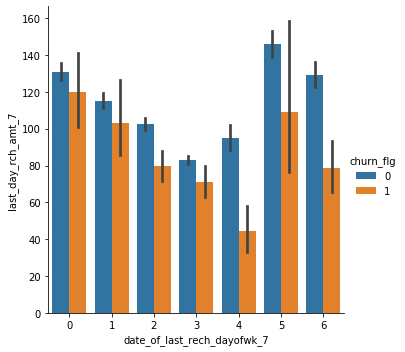

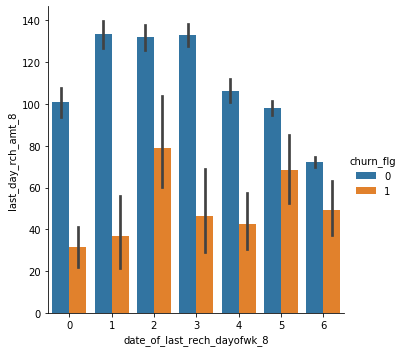

In [45]:
sns.catplot(x="date_of_last_rech_dayofwk_6", y="last_day_rch_amt_6",
            hue="churn_flg", kind="bar", data=tempdf)
plt.show()

sns.catplot(x="date_of_last_rech_dayofwk_7", y="last_day_rch_amt_7",
            hue="churn_flg", kind="bar", data=tempdf)
plt.show()

sns.catplot(x="date_of_last_rech_dayofwk_8", y="last_day_rch_amt_8",
            hue="churn_flg", kind="bar", data=tempdf)
plt.show()

#### Observation:
- There is no specific pattern between the day of recharge and last day of recharge amount w.r.t churning
- Churners have done less last amount recharge irrespective of which day the recharge is being done

#### Now lets drop datetime and day of the weeks column as we have analyzed the relationships of these columns with others and we also have date and month related information in other columns.

In [46]:
finaldf = tempdf.select_dtypes(exclude=['object', 'datetime64[ns]'])

In [47]:
print("Total unique mobile number: {}".format(finaldf['mobile_number'].nunique()))
print("Total number of rows: {}".format(len(finaldf)))

Total unique mobile number: 28487
Total number of rows: 28487


#### The feature mobile_number is unique for each row and thus is of no use for doing doing the prediction.<br> We can safely drop this feature without losing any information.

In [48]:
finaldf.drop(columns=['mobile_number'], inplace=True)

## Model Building

In [49]:
X = finaldf.drop(columns=['churn_flg'])
Y = finaldf['churn_flg']

#### Feature Scaling

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

#### Test Train Split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_std,Y, train_size=0.7,test_size=0.3,random_state=100)

#### Test and Train data dimension

In [52]:
print("Training feature dataset dimension: {}".format(X_train.shape))
print("Training target dataset dimension: {}".format(y_train.shape))
print("Test feature dataset dimension: {}".format(X_test.shape))
print("Test target dataset dimenion: {}".format(y_test.shape))

Training feature dataset dimension: (19940, 153)
Training target dataset dimension: (19940,)
Test feature dataset dimension: (8547, 153)
Test target dataset dimenion: (8547,)


### Dimensionality reduction using PCA

In [53]:
pca = PCA(svd_solver='randomized', random_state=100)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
    svd_solver='randomized', tol=0.0, whiten=False)

In [54]:
pca.components_

array([[ 6.97704825e-02,  7.59958342e-02,  7.42663064e-02, ...,
         3.15459959e-02,  3.10472856e-02,  2.11310082e-02],
       [ 1.90914664e-01,  2.05083241e-01,  2.00497007e-01, ...,
        -1.70998970e-02, -1.81794184e-02, -1.61093665e-02],
       [ 8.82623675e-02,  1.09722150e-01,  9.25367240e-02, ...,
        -2.23826718e-02, -2.05315365e-02, -2.61098780e-02],
       ...,
       [ 0.00000000e+00,  6.01826333e-16, -1.24542451e-15, ...,
         2.20026955e-17,  1.46892850e-17, -1.11835468e-16],
       [ 0.00000000e+00, -2.88010071e-16,  7.09074019e-16, ...,
        -6.21808046e-17,  4.81221701e-17,  1.09753201e-16],
       [ 3.24261855e-01,  3.47788898e-01, -7.36533821e-01, ...,
         4.33680869e-18, -4.05491613e-17,  6.85215773e-17]])

In [55]:
pca.explained_variance_ratio_

array([1.19925941e-01, 8.24506290e-02, 7.00212867e-02, 4.96883381e-02,
       3.98343881e-02, 3.79653439e-02, 2.97414095e-02, 2.61443218e-02,
       2.43383381e-02, 2.27281850e-02, 2.20175685e-02, 2.09663796e-02,
       1.98820130e-02, 1.94104411e-02, 1.78884977e-02, 1.58511772e-02,
       1.47421555e-02, 1.46057228e-02, 1.40175370e-02, 1.36770045e-02,
       1.29195393e-02, 1.27741048e-02, 1.20191746e-02, 1.13440823e-02,
       1.09099971e-02, 1.04430033e-02, 9.58339054e-03, 9.17791691e-03,
       8.57797143e-03, 7.99813325e-03, 7.50267032e-03, 7.38227863e-03,
       7.19924943e-03, 6.75399921e-03, 6.53273607e-03, 6.35876347e-03,
       6.11513975e-03, 6.02991581e-03, 5.50832382e-03, 5.47241915e-03,
       5.38588564e-03, 5.23114804e-03, 5.10386453e-03, 4.93583404e-03,
       4.90988758e-03, 4.77717398e-03, 4.65198339e-03, 4.57791007e-03,
       4.45796482e-03, 4.35331291e-03, 4.19276561e-03, 4.00329384e-03,
       3.53980495e-03, 3.44274381e-03, 3.39688087e-03, 3.24443862e-03,
      

### Scree Plot

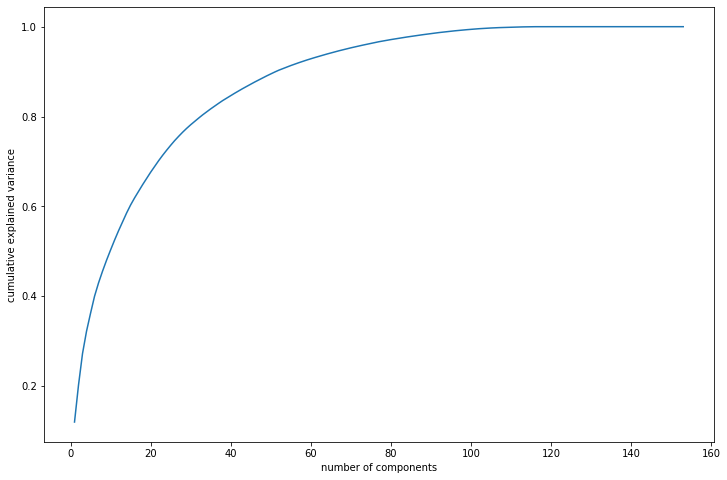

In [56]:
#Plotting the scree plot
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [57]:
print (pca.explained_variance_ratio_.cumsum())

[0.11992594 0.20237657 0.27239786 0.3220862  0.36192058 0.39988593
 0.42962734 0.45577166 0.48011    0.50283818 0.52485575 0.54582213
 0.56570414 0.58511458 0.60300308 0.61885426 0.63359641 0.64820214
 0.66221967 0.67589668 0.68881622 0.70159032 0.7136095  0.72495358
 0.73586358 0.74630658 0.75588997 0.76506789 0.77364586 0.78164399
 0.78914666 0.79652894 0.80372819 0.81048219 0.81701493 0.82337369
 0.82948883 0.83551875 0.84102707 0.84649949 0.85188537 0.85711652
 0.86222039 0.86715622 0.87206611 0.87684328 0.88149527 0.88607318
 0.89053114 0.89488445 0.89907722 0.90308051 0.90662032 0.91006306
 0.91345994 0.91670438 0.9198052  0.92284175 0.9257622  0.92860209
 0.93127912 0.93391992 0.93651546 0.93904946 0.94152933 0.94394829
 0.94628308 0.94853721 0.95077632 0.95290675 0.95497718 0.95699584
 0.95897038 0.96091482 0.96284067 0.96468761 0.96649573 0.96816678
 0.9697524  0.97128784 0.97278461 0.97421669 0.97563662 0.97702728
 0.97836851 0.97968799 0.98096497 0.98220352 0.98343184 0.9846

#### Observation:
- 99% variance is being explained by 96 components
- 95% variance is being explained by 69 components
- 90% variance is being explained by 52 components
- 85% variance is being explained by 41 components

#### Lets take 90% coverage and proceed with 52 components

In [58]:
pca_final = IncrementalPCA(n_components=52)
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(19940, 52)

In [59]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8547, 52)

#### Prediction with Logistic Regression

In [60]:
lr_learner = LogisticRegression()
model_pca = lr_learner.fit(df_train_pca,y_train)

#### Lets predict on the test data

In [61]:
pred_test = model_pca.predict_proba(df_test_pca)[:,1]
print("AUC: {:2.2}".format(metrics.roc_auc_score(y_test, pred_test)))

AUC: 0.86


#### Observation:
- We have taken 52 components with 90% variance on the training data.
- The resulting model can cover 86% area under the curve for test data

#### Lets follow the steps with in creasing the variance in te test data to 85%

In [62]:
pca_final85 = PCA(n_components=41)
df_train_pca85 = pca_final85.fit_transform(X_train)
df_test_pca85 = pca_final85.transform(X_test)
df_test_pca85.shape

(8547, 41)

### Prediction with Logistic Regression

In [63]:
lr_learner85 = LogisticRegression()
model_pca85 = lr_learner85.fit(df_train_pca85,y_train)

#### Lets predict on the test data

In [64]:
pred_test85 = model_pca85.predict_proba(df_test_pca85)[:,1]
print("AUC: {:2.2}".format(metrics.roc_auc_score(y_test, pred_test85)))

AUC: 0.85


#### Observation:
- We have taken 41 components with 85% variance on the training data.
- The resulting model can cover 85% area under the curve for test data

### Prediction using Random Forest

In [65]:
# instantiate Random Forest classifier with default hyper parameters
rfc = RandomForestClassifier(random_state=100, verbose=0, warm_start=False, class_weight="balanced_subsample")

In [66]:
rfc_trained= rfc.fit(df_train_pca,y_train)

In [67]:
print(classification_report(y_train,rfc.predict(df_train_pca)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     18536
           1       1.00      0.85      0.92      1404

    accuracy                           0.99     19940
   macro avg       0.99      0.93      0.96     19940
weighted avg       0.99      0.99      0.99     19940



In [68]:
print(classification_report(y_test,rfc.predict(df_test_pca)))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      7955
           1       0.47      0.09      0.15       592

    accuracy                           0.93      8547
   macro avg       0.70      0.54      0.56      8547
weighted avg       0.90      0.93      0.91      8547



ROC for the test dataset 76.3%


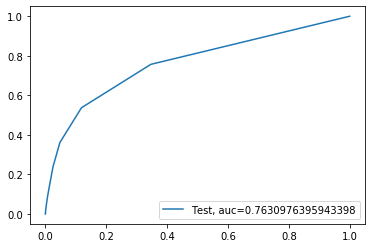

In [69]:
preds_RFC=rfc_trained.predict(df_test_pca)
preds_probs_RFC=rfc_trained.predict_proba(df_test_pca)[:,1]

accuracy = metrics.accuracy_score(y_test, preds_RFC)

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_probs_RFC)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

<Figure size 432x288 with 0 Axes>

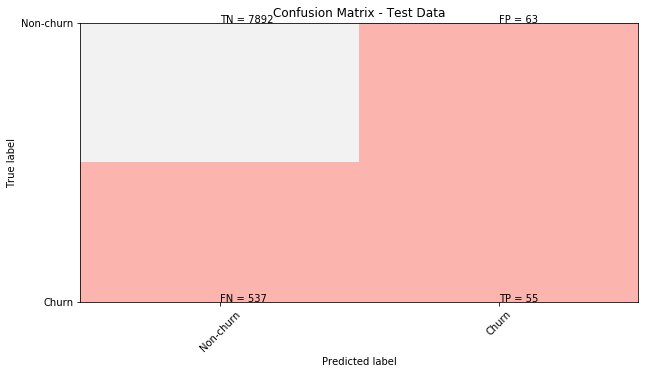

In [70]:
cm = confusion_matrix(y_test, preds_RFC)
plt.clf()
plt.figure(figsize=(10,10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-churn','Churn']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=10)
plt.show()

In [71]:
#Sensitivity = TP / (TP+FN)
#specificity = TN / (TN+FP)

print("Sensitivity: {}".format(100*round(53/(53+539),2)))
print("Specificity: {}".format(100*round(7900/(7900+55),2)))

Sensitivity: 9.0
Specificity: 99.0


### Conclusion:
- Good test data accuracy
- Low sensitivity makes less suitable
- PCA with logistic regression can be a better choice

### Best features

In [72]:
# run a random forest model on train data
max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node

rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features,
                                  class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=100, verbose=1)

In [73]:
# fit model
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   10.3s finished


RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
                       criterion='gini', max_depth=None, max_features=12,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=True,
                       random_state=100, verbose=1, warm_start=False)

In [74]:
rf_model.oob_score_

0.9363590772316951

In [75]:
# predict churn on test data
y_pred = rf_model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check area under curve
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[[7857   98]
 [ 460  132]]
ROC:    	 0.88


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [76]:
# predictors
features = finaldf.drop('churn_flg', axis=1).columns

# feature_importance
importance = rf_model.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 99.99999999999999


,variables,importance_percentage
0,total_ic_mou_8,4.798189
1,roam_ic_mou_8,4.575957
2,roam_og_mou_8,3.935849
3,arpu_change,3.473738
4,total_rech_amt_8,3.231471
5,loc_ic_t2m_mou_8,3.152928
6,loc_og_mou_8,3.109855
7,last_day_rch_amt_8,3.074039
8,loc_ic_mou_8,3.056493
9,loc_og_t2m_mou_8,2.966249


#### Top 30 Features

In [77]:
n = 30
top_features = list(feature_importance.variables[0:n])

In [78]:
top_features

['total_ic_mou_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'arpu_change',
 'total_rech_amt_8',
 'loc_ic_t2m_mou_8',
 'loc_og_mou_8',
 'last_day_rch_amt_8',
 'loc_ic_mou_8',
 'loc_og_t2m_mou_8',
 'arpu_8',
 'loc_ic_t2t_mou_8',
 'loc_og_t2t_mou_8',
 'ic_og_ratio_8',
 'offnet_mou_8',
 'total_og_mou_8',
 'std_og_mou_8',
 'max_rech_amt_8',
 'loc_ic_t2f_mou_8',
 'aon',
 'vol_data_mb_8',
 'std_ic_mou_8',
 'loc_og_mou_7',
 'ic_og_ratio_7',
 'av_rech_amt_data_8',
 'onnet_mou_8',
 'arpu_7',
 'std_ic_t2m_mou_8',
 'ic_og_ratio_6',
 'std_og_mou_7']

### Recommendation for Business

- From the important feature list we can see that features related to incoming & outgoing are key for identifying churn customers
- The company also need to pay attention on roaming charges
- They should also look for usage statistics on mobile data. If that is reduced they should be aware and give new offers to the customers
- Age on the network is also important. If the customer is not for long on the network bust still there is a decresae in the usage then they shoul be aware
- The company should also need to focus on STD and ISD rates